# Bay Wheels Trip Data Exploration

## Preliminary Wrangling

This document explores a dataset containing rental duration and attributes for approximately 296,000 bike rentals in January 2020 (https://www.lyft.com/bikes/bay-wheels/system-data) - '202001-baywheels-tripdata.csv.zip' .

In [93]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import time
import matplotlib.pyplot as plt 

%matplotlib inline

In [94]:
tripdata = pd.read_csv('202001-baywheels-tripdata.csv')

/Users/winnietong/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
tripdata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,No,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,Yes,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,No,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,No,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,No,NaN


In [96]:

tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 15 columns):
duration_sec               295854 non-null int64
start_time                 295854 non-null object
end_time                   295854 non-null object
start_station_id           146286 non-null float64
start_station_name         146866 non-null object
start_station_latitude     295854 non-null float64
start_station_longitude    295854 non-null float64
end_station_id             145934 non-null float64
end_station_name           146511 non-null object
end_station_latitude       295854 non-null float64
end_station_longitude      295854 non-null float64
bike_id                    295854 non-null int64
user_type                  295854 non-null object
bike_share_for_all_trip    110108 non-null object
rental_access_method       185746 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 33.9+ MB


In [97]:
tripdata.describe() # numerical_variables 

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,295854.000000,146286.000000,295854.000000,295854.000000,145934.000000,295854.000000,295854.000000,295854.00000
mean,780.473193,168.900879,37.751277,-122.357866,161.061788,37.751261,-122.356994,321533.84539
std,2037.786317,141.956388,0.228337,0.650796,140.766154,0.238642,0.688512,307015.31534
min,60.000000,3.000000,0.000000,-122.513871,3.000000,0.000000,-122.513847,12.00000
25%,369.000000,53.000000,37.766214,-122.419481,43.000000,37.766376,-122.418306,11328.00000
50%,588.000000,120.000000,37.777158,-122.403234,113.000000,37.777370,-122.402717,279974.00000
75%,912.000000,263.000000,37.790102,-122.392450,250.000000,37.790492,-122.392546,545607.00000
max,811077.000000,506.000000,37.880222,0.000000,506.000000,37.927622,0.000000,999952.00000


In [98]:
print(tripdata.shape)

(295854, 15)


In [99]:
tripdata.user_type.value_counts() ##maybe can look at the duration travelled vs user_type

Subscriber    170988
Customer      124866
Name: user_type, dtype: int64

In [100]:
tripdata.rental_access_method.value_counts() ## can be interesting data but has lot of nulls

app        171751
clipper     13995
Name: rental_access_method, dtype: int64

### What is the structure of your dataset?

There are 295,854 bike rental data in the 2020-01 Bay Wheel dataset with 8 features, which are duration, start time, end time, location of pick-up, location of drop-off, customer type, bike share for all trips and rental access method. Most variables are categorical variable, with a few discrete variables. 


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the duration of the bike rental in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the type of users, the day of the week and hour of the week will have the strongest effect on the count and duration of rental: users who are subscribers will hire more frequently as they are regular users. Week days and peak hours (morning and late evening) should have more renters. Users who return the bike at the same depot would take a longer time. 


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: **duration_sec**.

In [101]:
tripdata.duration_sec.describe()

count    295854.000000
mean        780.473193
std        2037.786317
min          60.000000
25%         369.000000
50%         588.000000
75%         912.000000
max      811077.000000
Name: duration_sec, dtype: float64

>Rather than looking at the duration in seconds, I am going to transform it to minutes or hour for easier interpretation. 

In [102]:
tripdata['duration_min'] = tripdata['duration_sec']/60
tripdata['duration_hr'] = tripdata['duration_min']/60
tripdata[['duration_sec','duration_min','duration_hr']].describe()

,duration_sec,duration_min,duration_hr
count,295854.000000,295854.000000,295854.000000
mean,780.473193,13.007887,0.216798
std,2037.786317,33.963105,0.566052
min,60.000000,1.000000,0.016667
25%,369.000000,6.150000,0.102500
50%,588.000000,9.800000,0.163333
75%,912.000000,15.200000,0.253333
max,811077.000000,13517.950000,225.299167


>After investigating the duration period, I noticed that the maximum number is ridiculously high comparing to the data in differeny quartiles. There can be some outliers there so when I investigate I should be more careful not to exclude outliers. I also decided I would go with using **minute** as the perimenter.

In [103]:
# I want to see what the size of the outliers
tripdata[tripdata.duration_min > 100].shape[0]


1006

>Only 1006. That's good because even if I exclude the data, I am not truncating a lot of information. I am going to create a new table called *outlier_min* to capture this data for futher analysis later.

In [12]:
outlier_min = tripdata[tripdata.duration_min > 100]
outlier_min.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,duration_hr
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,No,NaN,1385.300000,23.088333
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,Yes,NaN,1137.316667,18.955278
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,No,NaN,923.450000,15.390833
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,No,NaN,915.483333,15.258056
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,No,NaN,928.333333,15.472222


In [13]:
tripdata_cleaned = tripdata.copy()

In [14]:
tripdata_cleaned = tripdata_cleaned[tripdata_cleaned.duration_min <= 100]

In [104]:
#Checking the % of outliers vs the full dataset
tripdata_cleaned.shape

(294848, 22)

In [16]:
295854-294848 #checking that I get the data that I expected

1006

In [105]:
# Now I wanna see some general stats 
tripdata_cleaned['duration_min'].describe()

count    294848.000000
mean         12.146997
std           9.722978
min           1.000000
25%           6.133333
50%           9.783333
75%          15.116667
max          99.933333
Name: duration_min, dtype: float64

#### I am going to use histogram to see the distrubtion of duration of all the bike rentals in this dataset.

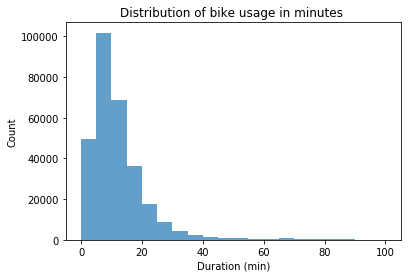

In [18]:
binsize = np.arange(0,100+5,5)
plt.hist(data=tripdata_cleaned, x='duration_min',bins = binsize,alpha = 0.7)
plt.title('Distribution of bike usage in minutes ')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.show()

>This looks like it is a unimodal graph, and the data is hightly skewed to the right with a long tail on the right. I am going to try a log scaling and see how whether I can find something interesting. 

In [19]:
log_min = np.log10(tripdata_cleaned['duration_min'])

In [20]:
log_min.describe()

count    294848.000000
mean          0.980328
std           0.301891
min           0.000000
25%           0.787697
50%           0.990487
75%           1.179456
max           1.999710
Name: duration_min, dtype: float64

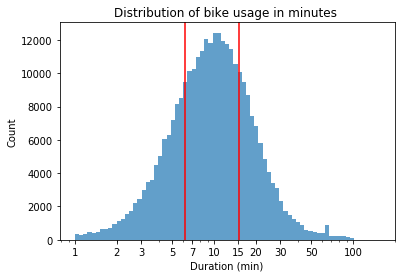

In [21]:
log_binsize = 10**np.arange(0,np.log10(tripdata_cleaned['duration_min']).max() +0.2,0.03)
plt.hist(data=tripdata_cleaned, x='duration_min',bins = log_binsize,alpha = 0.7)
plt.title('Distribution of bike usage in minutes ')
plt.xscale('log')
x_tick=[1,2,3,5,7,10,15,20,30,50,100]
plt.xticks(x_tick,x_tick)
plt.xlabel('Duration (min)')
plt.axvline(x=6.15, color='r') ## This line shows upperbond of data - 25% quartile
plt.axvline(x=15.2, color='r') ## This line shows upperbond of data - 75% quartile
plt.ylabel('Count')
plt.show()

>After converting the data using log scale, the distribution became to much clearer. The data showed a normal distrubtion with its mean being around 10 minutes. There was a little increae at around 60 minutes. I wondered whether they were some odd data. 

#### Now I am moving on to some categorical variables: **user_type, rental_access_method and bike_share_for_all_trip**

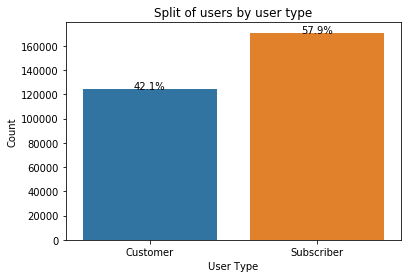

In [23]:
sb.countplot(data=tripdata_cleaned, x='user_type')
plt.title('Split of users by user type')
plt.xlabel('User Type')
plt.ylabel('Count')
# add annotations
n_points = tripdata_cleaned.shape[0]
utype_counts = tripdata_cleaned['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = utype_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

plt.show()

>There were more subscribers than customers, the splits were 58% and 42% respectively. 

#### I know that there are a lot of nulls in **rental_access_method** column. I want to analyse the data nevertheless. To ensure I am not going to mess up the original dataset, I will create a copy for this specific analysis.

In [111]:
#I might need to truncate some data as I examine this category so I am going to create a copy of the original dataset
tripdata_cleaned_ra = tripdata_cleaned.copy()

In [112]:
#I am going to use boolean to filter the data that I need
tripdata_cleaned_ra['ram'] = tripdata_cleaned_ra['rental_access_method'].isin(['app','clipper'])

In [116]:
#checking to see in my code above works
tripdata_cleaned_ra.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,duration_min,duration_hr,start_hour,start_combo,end_combo,return_trip,week_day,ram
110108,794,2020-01-28 20:50:28,2020-01-28 21:03:43,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.734992,...,NaN,app,13.233333,0.220556,20,"0.0,0.0","37.7349916667,-122.39091200000001",False,1,True
110109,734,2020-01-22 20:49:20,2020-01-22 21:01:34,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735049,...,NaN,app,12.233333,0.203889,20,"0.0,0.0","37.7350488333,-122.3912866667",False,2,True


In [117]:
#I filter our all the null values in *ram* column
tripdata_cleaned_ra = tripdata_cleaned_ra[tripdata_cleaned_ra.ram]

In [118]:
#Dropping columns that I don't need
tripdata_cleaned_ra = tripdata_cleaned_ra.drop(columns=['ram','duration_hr'])

In [28]:
tripdata_cleaned_ra.rental_access_method.value_counts()

app        171399
clipper     13985
Name: rental_access_method, dtype: int64

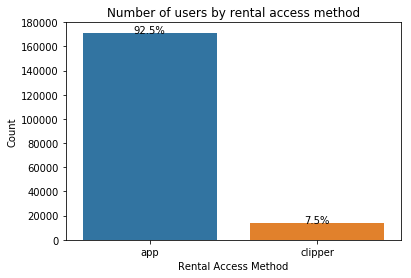

In [29]:
sb.countplot(data=tripdata_cleaned_ra, x='rental_access_method')
plt.title('Number of users by rental access method')
plt.xlabel('Rental Access Method')
plt.ylabel('Count')
# add annotations
n_points = tripdata_cleaned_ra.shape[0]
ra_counts = tripdata_cleaned_ra['rental_access_method'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = ra_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
plt.show()

>As mentioned before, a lot of data is missing for this category which is why the two categories do not add up to 100%. If I were going to take a closer at this categorial variable in relation to duration minute, I would need to drop all the null values first. 

#### I want to see information in the *bike share for all trip* column

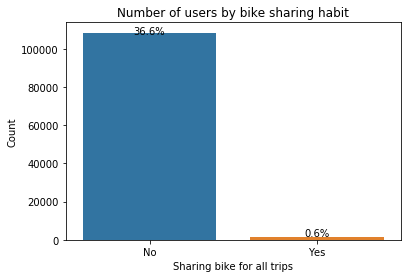

In [30]:
sb.countplot(data=tripdata, x='bike_share_for_all_trip')
plt.title('Number of users by bike sharing habit')
plt.xlabel('Sharing bike for all trips')
plt.ylabel('Count')
# add annotations
n_points = tripdata_cleaned.shape[0]
bs_counts = tripdata_cleaned['bike_share_for_all_trip'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = bs_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
plt.show()

>Just like rental access method, a lot of data is missing for this category which is why the two categories do not add up to 100%. If I were going to take a closer at this categorial variable in relation to duration minute, I would need to drop all the null values first. However, given that only 0.6% of share bike, I am **not** going to analyse the data further. 

#### I wanted to see if the start time of the day had anything thing to do with the rental duration. 

In [119]:
#Converting start_time from object to datetime
tripdata_cleaned['start_time'] = pd.to_datetime(tripdata_cleaned['start_time'])

In [32]:
tripdata_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294848 entries, 7 to 295852
Data columns (total 17 columns):
duration_sec               294848 non-null int64
start_time                 294848 non-null datetime64[ns]
end_time                   294848 non-null object
start_station_id           145575 non-null float64
start_station_name         146154 non-null object
start_station_latitude     294848 non-null float64
start_station_longitude    294848 non-null float64
end_station_id             145245 non-null float64
end_station_name           145821 non-null object
end_station_latitude       294848 non-null float64
end_station_longitude      294848 non-null float64
bike_id                    294848 non-null int64
user_type                  294848 non-null object
bike_share_for_all_trip    109464 non-null object
rental_access_method       185384 non-null object
duration_min               294848 non-null float64
duration_hr                294848 non-null float64
dtypes: datetime64[ns](1)

In [33]:
#I am going to create an extra column to extract the hour of the start_time
tripdata_cleaned['start_hour'] = tripdata_cleaned.start_time.dt.hour

In [34]:
tripdata_cleaned.start_hour.value_counts()

17    33557
8     30695
18    24973
16    24320
9     22938
15    16887
19    16711
7     15530
12    14770
13    14469
14    14312
10    13291
11    13281
20    10707
21     7955
6      5786
22     5244
23     3064
0      1767
5      1634
1      1307
2       840
4       464
3       346
Name: start_hour, dtype: int64

#### I am going to create a histogram to see the distrubtion of bike rentals at different starting time

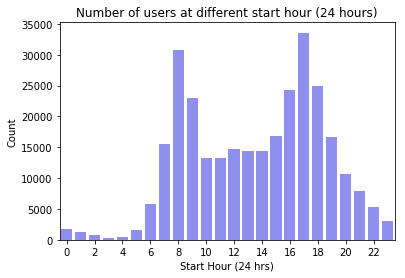

In [35]:
figsize=[6,8]
sb.countplot(data=tripdata_cleaned, x='start_hour',alpha=0.5,color = 'b')
xticks = [0,2,4,6,8,10,12,14,16,18,20,22]
plt.xticks(xticks,xticks)
plt.xlabel('Start Hour (24 hrs)')
plt.ylabel('Count')
plt.title('Number of users at different start hour (24 hours)')
plt.show()

>The bar chart above showed bimodal distribution of data. The number of users started to climb up at 6 am until 8 am, then dropped to a steady level from 10am to 3pm, then it started to rise again with its highest number of users during the day at 5pm. It would be nice if we had extra data to see if users were using the bikes as their means of transport to go to work.

#### Now I move on to investigate the location of pick-up and drop-off points

I also noticed that not all users returned the bike at the same location. For some weird reasons, start_station_id and end_station_id have a lot of missing values. However, the latitude and longitude of start and end locations have all values. I am going to create two columns combining these columns to form a unique identifier. 

In [36]:
#checking how many nulls in the end_station_id column

tripdata_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294848 entries, 7 to 295852
Data columns (total 18 columns):
duration_sec               294848 non-null int64
start_time                 294848 non-null datetime64[ns]
end_time                   294848 non-null object
start_station_id           145575 non-null float64
start_station_name         146154 non-null object
start_station_latitude     294848 non-null float64
start_station_longitude    294848 non-null float64
end_station_id             145245 non-null float64
end_station_name           145821 non-null object
end_station_latitude       294848 non-null float64
end_station_longitude      294848 non-null float64
bike_id                    294848 non-null int64
user_type                  294848 non-null object
bike_share_for_all_trip    109464 non-null object
rental_access_method       185384 non-null object
duration_min               294848 non-null float64
duration_hr                294848 non-null float64
start_hour               

In [122]:
# I am going to use apply & lambda functions to create two new columns containing the pick-up and drop-off locations 
#using latitude and longtitude
tripdata_cleaned['start_combo'] = tripdata_cleaned[['start_station_latitude', 'start_station_longitude']].apply(lambda x: ','.join(x.astype(str)), axis=1)
tripdata_cleaned['end_combo'] = tripdata_cleaned[['end_station_latitude', 'end_station_longitude']].apply(lambda x: ','.join(x.astype(str)), axis=1)


In [123]:
tripdata_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,duration_hr,start_hour,start_combo,end_combo,return_trip,week_day
7,4038,2020-01-31 23:32:03.907,2020-02-01 00:39:22.0210,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,...,Customer,No,NaN,67.300000,1.121667,23,"37.7639340252,-122.4706506729","37.7639340252,-122.4706506729",True,4
8,4059,2020-01-31 23:31:01.161,2020-02-01 00:38:40.8570,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,...,Customer,No,NaN,67.650000,1.127500,23,"37.7639340252,-122.4706506729","37.7639340252,-122.4706506729",True,4
9,1980,2020-01-31 23:49:09.230,2020-02-01 00:22:09.7540,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,198.0,Snow Park,37.807813,...,Customer,No,NaN,33.000000,0.550000,23,"37.8717192,-122.27306770000001","37.8078131822,-122.26449608799999",False,4
10,1969,2020-01-31 23:49:03.972,2020-02-01 00:21:53.5730,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,198.0,Snow Park,37.807813,...,Customer,No,NaN,32.816667,0.546944,23,"37.8717192,-122.27306770000001","37.8078131822,-122.26449608799999",False,4
11,1611,2020-01-31 23:49:10.931,2020-02-01 00:16:02.4310,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,259.0,Addison St at Fourth St,37.866249,...,Subscriber,Yes,NaN,26.850000,0.447500,23,"37.8368013,-122.2640037","37.866248999999996,-122.29937079999999",False,4


In [124]:
tripdata_cleaned.shape

(294848, 22)

In [125]:
#Checking the cleaness of data
tripdata_cleaned.start_combo.isnull().sum()

0

In [126]:
#Checking the cleaness of data

tripdata_cleaned.end_combo.isnull().sum()

0

In [127]:
# Now I am going to create another column using boolean to indicate whether the pick-up and drop-off 
#locations are the same
tripdata_cleaned = tripdata_cleaned.assign(return_trip = tripdata_cleaned.start_combo == tripdata_cleaned.end_combo)

In [46]:
tripdata_cleaned['return_trip'].value_counts()

False    291414
True       3434
Name: return_trip, dtype: int64

In [128]:
#I want to use a piechart to show data this time so I am going to get the % of users who pick up and drop off at
#the same location
same_depot = round(tripdata_cleaned['return_trip'].mean()*100,2)
same_depot

1.16

In [129]:
#I want to use a piechart to show data this time so I am going to get the % of users who pick up and drop off at
#the different location
diff_depot = round((1-tripdata_cleaned['return_trip'].mean())*100,2)
diff_depot

98.84

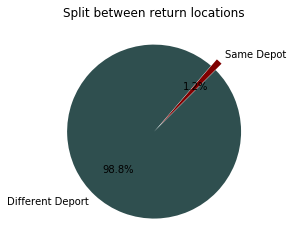

In [49]:
figsize = [6,8]
mean = [same_depot, diff_depot]
location = ['Same Depot', 'Different Deport']
explode = (0.1,0)
colors = ['maroon', 'darkslategray']
plt.pie(mean, labels=location, colors = colors,startangle=45, autopct='%.1f%%',explode=explode)
plt.title('Split between return locations')
plt.show()

>As expected, most customers (98.8%) actually returned the bike at a different location. I wonder if this would have anything to do with the duration of rental.

#### I also wanted to see the distrubtion of rentals in terms of week day.

In [130]:
#I am getting the wee day data via the start_time column
tripdata_cleaned['week_day'] = tripdata_cleaned.start_time.dt.dayofweek

In [51]:
tripdata_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,duration_hr,start_hour,start_combo,end_combo,return_trip,week_day
7,4038,2020-01-31 23:32:03.907,2020-02-01 00:39:22.0210,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,...,Customer,No,NaN,67.300000,1.121667,23,"37.7639340252,-122.4706506729","37.7639340252,-122.4706506729",True,4
8,4059,2020-01-31 23:31:01.161,2020-02-01 00:38:40.8570,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,...,Customer,No,NaN,67.650000,1.127500,23,"37.7639340252,-122.4706506729","37.7639340252,-122.4706506729",True,4
9,1980,2020-01-31 23:49:09.230,2020-02-01 00:22:09.7540,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,198.0,Snow Park,37.807813,...,Customer,No,NaN,33.000000,0.550000,23,"37.8717192,-122.27306770000001","37.8078131822,-122.26449608799999",False,4
10,1969,2020-01-31 23:49:03.972,2020-02-01 00:21:53.5730,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,198.0,Snow Park,37.807813,...,Customer,No,NaN,32.816667,0.546944,23,"37.8717192,-122.27306770000001","37.8078131822,-122.26449608799999",False,4
11,1611,2020-01-31 23:49:10.931,2020-02-01 00:16:02.4310,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,259.0,Addison St at Fourth St,37.866249,...,Subscriber,Yes,NaN,26.850000,0.447500,23,"37.8368013,-122.2640037","37.866248999999996,-122.29937079999999",False,4


Now I am going to use a histogram to find the distribution of rentals on different days during the week

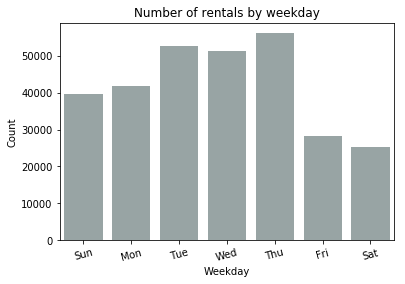

In [52]:
fig, ax = plt.subplots(1,1) 
x = np.arange(0,7,1)
sb.countplot(data =tripdata_cleaned, x='week_day',color='darkslategrey',alpha=0.5)
x_ticks_labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation=15, fontsize=10)
plt.title('Number of rentals by weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')

plt.show()

>It is interesting to see that the number of bike rentals were not steady during weekdays, given that the data previously showed that most renters were taking bikes during office peak hours. Rentals on Sunday seemed also high, which constrasted to the number of rentals on Saturday.   

## Bivariate Exploration

#### I am going to compare the rental duration by user type

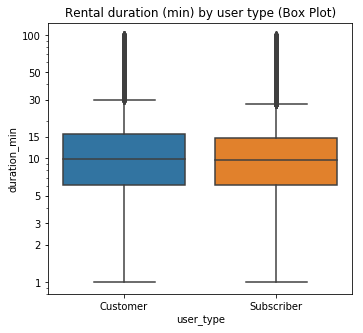

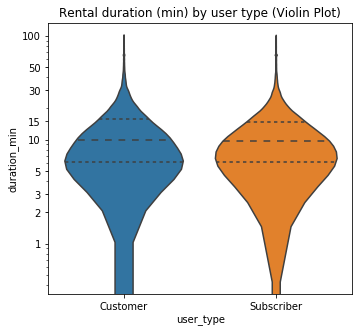

In [53]:
plt.figure(figsize = [12, 5])
plt.subplot(1,2,1)
log_binsize = 10**np.arange(0,np.log10(tripdata_cleaned['duration_min']).max() +0.2,0.03)
sb.boxplot(data = tripdata_cleaned, x = 'user_type', y = 'duration_min')

plt.title('Rental duration (min) by user type (Box Plot)')
plt.yscale('log')
y_tick=[1,2,3,5,10,15,30,50,100]
plt.yticks(y_tick,y_tick)
plt.show()

plt.figure(figsize = [12, 5])
plt.subplot(1,2,2)
log_binsize = 10**np.arange(0,np.log10(tripdata_cleaned['duration_min']).max() +0.2,0.03)
sb.violinplot(data = tripdata_cleaned, x = 'user_type', y = 'duration_min',inner = 'quartile')

plt.title('Rental duration (min) by user type (Violin Plot)')
plt.yscale('log')
y_tick=[1,2,3,5,10,15,30,50,100]
plt.yticks(y_tick,y_tick)
plt.show()

>I wanted to see if there was any difference in rental duration between normal customers and regular subscriber of the platform. Intereatingly, the lower and upper quartiles, and the median in these two segments of users are almost of the same. The boxplot does a slightly better job to show the differences of data distribution between these two segments, with subscriber's median, lower and upper quartiles being slightly lower than that of normal customers'. 

#### I also want to see if there's any major difference in terms of rental duration when users use different methods to access the bike

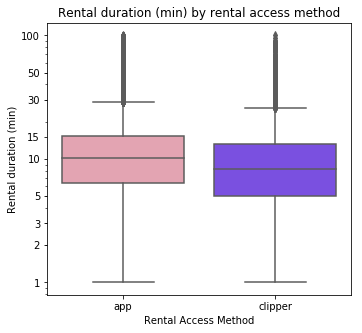

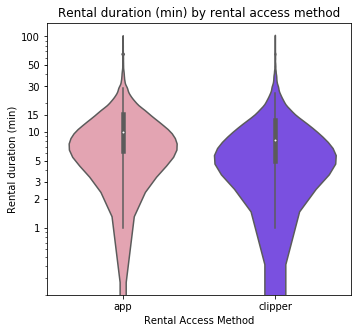

In [54]:
## Rental Access Method
plt.figure(figsize = [12, 5])
plt.subplot(1,2,1)
type_colour = {'app': '#ee99ac', 'clipper': '#7038f8'}
log_binsize = 10**np.arange(0,np.log10(tripdata_cleaned_ra['duration_min']).max() +0.2,0.03)
sb.boxplot(data = tripdata_cleaned_ra, x = 'rental_access_method', y = 'duration_min',color = 'y',palette = type_colour)

plt.title('Rental duration (min) by rental access method')
plt.xlabel('Rental Access Method')
plt.ylabel('Rental duration (min)')
plt.yscale('log')
y_tick=[1,2,3,5,10,15,30,50,100]
plt.yticks(y_tick,y_tick)
plt.show();

plt.figure(figsize = [12, 5])
plt.subplot(1,2,2)
type_colour = {'app': '#ee99ac', 'clipper': '#7038f8'}

log_binsize = 10**np.arange(0,np.log10(tripdata_cleaned_ra['duration_min']).max() +0.2,0.03)
sb.violinplot(data = tripdata_cleaned_ra, x = 'rental_access_method', y = 'duration_min',palette = type_colour)

plt.title('Rental duration (min) by rental access method')
plt.xlabel('Rental Access Method')
plt.ylabel('Rental duration (min)')
plt.yscale('log')
y_tick=[1,2,3,5,10,15,30,50,100]
plt.yticks(y_tick,y_tick)
plt.show()

>It is worthnoting that that median, lower and upper quartiles of clipper are lower than that of the app. The median of clipper is around 8 and the lower quartile is just below 5, while that of app's are 10 and 6 respectively. 

#### Now I want to see the relationship between rental duration and start hour of the trip

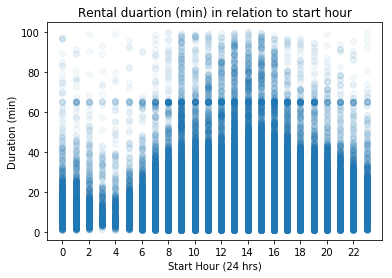

In [56]:
figsize=[12,8]
plt.scatter(data=tripdata_cleaned, x='start_hour',y='duration_min',alpha=0.05)
plt.xlabel('Start Hour (24 hrs)')
plt.ylabel('Duration (min)')
plt.title('Rental duartion (min) in relation to start hour')
x_ticks = [0,2,4,6,8,10,12,14,16,18,20,22]
plt.xticks(x_ticks,x_ticks)
plt.show()

>For rental duration less than 20 minutes, it appeared that there were constant amount of users renting bikes around the clock. Most of the longer rentals happened during the day, started at around 7am and its peak at 1pm and started declining after 4pm. 
<br>
<br>
>As I was adjustting the transparency of the colour, I discovered something very weird. Regardless of the starting hour, some users were renting bikes for around 64 minuts. As I mentioned above when creating a bar chart using log scale to demonstrate the distribution of duration, there was a little increase of number of users who rented bikes for precisely around 60 minutes. I decided to investigate further.

#### Investigate the odd group of data which shows users renting bikes at different hours of the day for aroudn 60 minutes

In [57]:
odd_min = (tripdata_cleaned['duration_min'] >= 62) & (tripdata_cleaned['duration_min'] <= 68)

In [58]:
odd_min_df = tripdata_cleaned.loc[odd_min,:]

In [59]:
odd_min_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,duration_hr,start_hour,start_combo,end_combo,return_trip,week_day
7,4038,2020-01-31 23:32:03.907,2020-02-01 00:39:22.0210,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,...,Customer,No,NaN,67.300000,1.121667,23,"37.7639340252,-122.4706506729","37.7639340252,-122.4706506729",True,4
8,4059,2020-01-31 23:31:01.161,2020-02-01 00:38:40.8570,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,...,Customer,No,NaN,67.650000,1.127500,23,"37.7639340252,-122.4706506729","37.7639340252,-122.4706506729",True,4
1325,3825,2020-01-31 16:38:34.293,2020-01-31 17:42:19.4400,441.0,Chestnut St at Van Ness Ave,37.802288,-122.424509,399.0,Bay St at Fillmore St,37.802636,...,Customer,No,NaN,63.750000,1.062500,16,"37.8022883861,-122.42450863120001","37.8026359497,-122.4362888932",False,4
1328,3994,2020-01-31 16:35:02.154,2020-01-31 17:41:36.1780,441.0,Chestnut St at Van Ness Ave,37.802288,-122.424509,399.0,Bay St at Fillmore St,37.802636,...,Customer,No,NaN,66.566667,1.109444,16,"37.8022883861,-122.42450863120001","37.8026359497,-122.4362888932",False,4
2209,3934,2020-01-31 13:50:07.339,2020-01-31 14:55:41.3650,160.0,West Oakland BART Station,37.805318,-122.294837,187.0,Jack London Square,37.796248,...,Customer,No,NaN,65.566667,1.092778,13,"37.805318299999996,-122.2948365","37.796248,-122.279352",False,4


In [60]:
odd_min_df.shape

(978, 22)

I want to use histogram to see the distribution of this odd group|

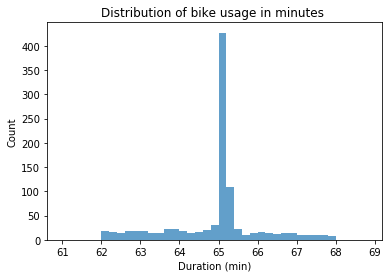

In [61]:
figsize=[8,8]
binsize = np.arange(61,69,0.2)
plt.hist(data=odd_min_df, x='duration_min',bins = binsize,alpha = 0.7)
plt.title('Distribution of bike usage in minutes ')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.show()

>It seems like the peak was at 65 minutes. Now I am very curious. I decided to look at the pick-up and drop-off location for rental period between 65 and 66 minutes. I am going to take a further step and take a closer look

In [62]:
odd_min_deep = (tripdata_cleaned['duration_min'] >= 65) & (tripdata_cleaned['duration_min'] <= 66)

In [63]:
odd_min_deep_df = tripdata_cleaned.loc[odd_min_deep,:]

In [64]:
odd_min_deep_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,duration_hr,start_hour,start_combo,end_combo,return_trip,week_day
2209,3934,2020-01-31 13:50:07.339,2020-01-31 14:55:41.3650,160.0,West Oakland BART Station,37.805318,-122.294837,187.0,Jack London Square,37.796248,...,Customer,No,NaN,65.566667,1.092778,13,"37.805318299999996,-122.2948365","37.796248,-122.279352",False,4
6611,3927,2020-01-30 12:38:19.804,2020-01-30 13:43:47.7680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,...,Customer,No,NaN,65.450000,1.090833,12,"37.795392,-122.394203","37.80477,-122.40323400000001",False,3
6613,3900,2020-01-30 12:38:27.666,2020-01-30 13:43:27.6880,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,...,Customer,No,NaN,65.000000,1.083333,12,"37.795392,-122.394203","37.80477,-122.40323400000001",False,3
18573,3930,2020-01-27 13:24:39.457,2020-01-27 14:30:10.3690,164.0,Isabella St at San Pablo Ave,37.814988,-122.274844,164.0,Isabella St at San Pablo Ave,37.814988,...,Customer,No,NaN,65.500000,1.091667,13,"37.8149882304,-122.2748440504","37.8149882304,-122.2748440504",True,0
21014,3937,2020-01-26 16:36:55.071,2020-01-26 17:42:32.9020,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,436.0,McKinnon Ave at 3rd St,37.736296,...,Customer,No,NaN,65.616667,1.093611,16,"37.7810737,-122.4117382","37.736295872199996,-122.38996982569999",False,6


In [131]:
# I want to see the features of this odd group of data
odd_min_deep_df.return_trip.value_counts()/odd_min_deep_df.shape[0]

False    0.989813
True     0.010187
Name: return_trip, dtype: float64

In [132]:
#Just checking if it is always coming from the same locations - just so I can understand if it is always the same renter
odd_min_deep_df.start_combo.value_counts()

37.795392,-122.394203                     5
37.7809545996,-122.3997491598             4
37.789756,-122.39464299999999             4
37.772406,-122.4356498                    3
37.7858806269,-122.4089150084             3
37.77588,-122.39317                       3
37.747299600000005,-122.41140290000001    3
37.7616343,-122.3906477                   3
37.7810737,-122.4117382                   3
37.776598,-122.39528200000001             3
37.8027461525,-122.41357862950001         2
37.80477,-122.40323400000001              2
37.335885,-121.88566000000002             2
37.787290000000006,-122.39438             2
37.7896254,-122.400811                    2
37.78967670000001,-122.39042849999998     2
37.7657829868,-122.4576365948             2
37.8042232774,-122.40164279940001         2
37.329732,-121.90178200000001             2
37.7871680147,-122.3880979233             2
37.7670445797,-122.390833497              2
37.7913,-122.399051                       2
37.796389399999995,-122.3945855 

>Seems like most pick-up and drop-off locations are different

#### I am going to look at the user type of this segement of data

In [67]:
odd_min_deep_df.user_type.value_counts()/odd_min_deep_df.shape[0]

Subscriber    0.650255
Customer      0.349745
Name: user_type, dtype: float64

>Initially I thought maybe it was from the same user who would likely be renting bikes regularly and frequently, who would likely have the same start location. However, it seemed like my assumption was wrong and I couldn't find an obviously explanation for this odd group of data. 

#### I am also going to look at the start hour of this odd group

In [68]:
odd_min_deep_df.start_hour.value_counts()

12    54
13    54
16    45
17    44
15    42
8     37
11    36
14    33
19    33
18    31
9     30
10    27
7     21
21    16
20    12
6     11
1     11
23    10
22    10
5      9
2      8
4      6
0      5
3      4
Name: start_hour, dtype: int64

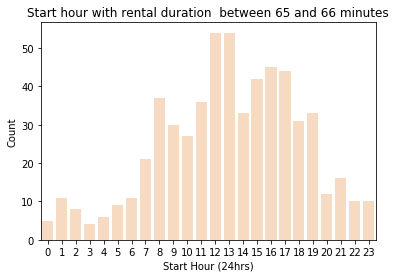

In [90]:
sb.countplot(data=odd_min_deep_df,x='start_hour',color = 'peachpuff')
plt.title('Start hour with rental duration  between 65 and 66 minutes')
plt.xlabel('Start Hour (24hrs)')
plt.ylabel('Count')
plt.show()

>This is interesting - from the full dataset, the peak time for rental were in the morning at around 8am and in late afternoon at around 5pm. For this group of users, the peak time was at aroud noon. 

## Multivariate Exploration

#### I want to look at the relationship between duration_min, user_type and week_day.

In [70]:
tripdata_cleaned.groupby(['week_day','user_type']).mean()['duration_min']

week_day  user_type 
0         Customer      12.286517
          Subscriber    11.569948
1         Customer      11.329342
          Subscriber    11.125385
2         Customer      12.038064
          Subscriber    11.532232
3         Customer      11.722386
          Subscriber    11.375966
4         Customer      12.350276
          Subscriber    11.812828
5         Customer      15.892708
          Subscriber    12.983589
6         Customer      16.174247
          Subscriber    12.760689
Name: duration_min, dtype: float64

In [71]:
tripdata_cleaned.user_type.value_counts()

Subscriber    170799
Customer      124049
Name: user_type, dtype: int64

In [72]:
tripdata_cleaned.week_day.value_counts()

4    56076
2    52607
3    51167
1    41878
0    39574
5    28272
6    25274
Name: week_day, dtype: int64

#### I decided I am going to use facetgrid to see the trend of rental duration by user type of different week day

/Users/winnietong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


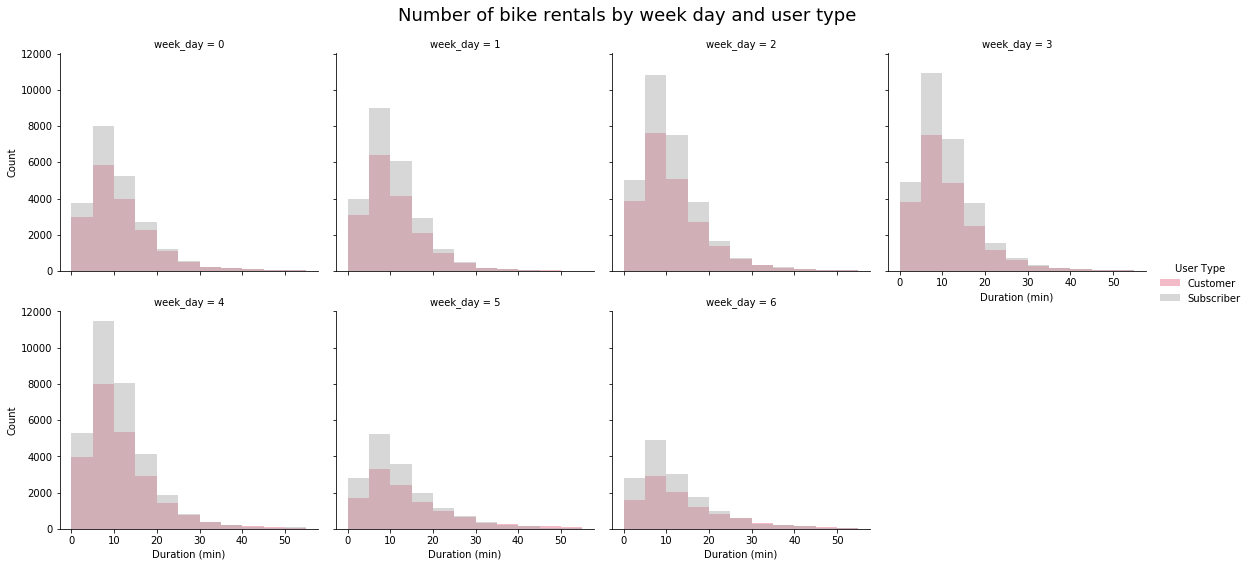

In [73]:

type_colour = {'Customer': '#e35675', 'Subscriber': '#9d9d9d'}
g = sb.FacetGrid(data = tripdata_cleaned, col = 'week_day',hue='user_type', col_wrap = 4, size = 4,palette= type_colour)
g.map(plt.hist, "duration_min",bins = np.arange(0,60, 5),alpha = 0.4 )
g.set_axis_labels(x_var="Duration (min)", y_var="Count").add_legend(title='User Type')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Number of bike rentals by week day and user type', fontsize=18)
plt.show()


>It appears that the two user groups followed the same trajectory on different days during the week, there is nothing particularly special about it.

#### I am going to use the average duration of rental to observe relationship between week day and user type instead

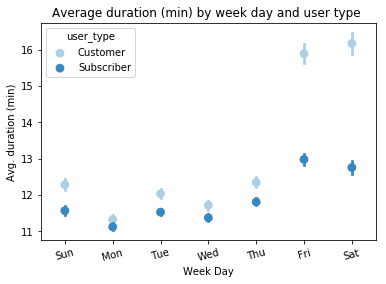

In [133]:
fig, ax = plt.subplots(1,1) 
sb.pointplot(data = tripdata_cleaned, x = 'week_day', y = 'duration_min',hue='user_type', linestyles = "",  palette = 'Blues')
plt.title('Average duration (min) by week day and user type ')
plt.xlabel('Week Day')
plt.ylabel('Avg. duration (min)') 
x = np.arange(0,7,1)
x_ticks_labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation=15, fontsize=10)
plt.show()

>The point plot below shows intersting results. On average, from Sunday to Thursday, the average duration (min) between customers and subscribers are more or less the same. However, on Friday and Saturday, the average duration of customers is at around 3 minutes longer than that of subscribers. I wonder if it had anything to do with marketing promotions. It would be great if such kind of data was available so that we could conduct further correlation analysis. 

I want to quickly check the average rental duration for users who returned bike at the same or different depot

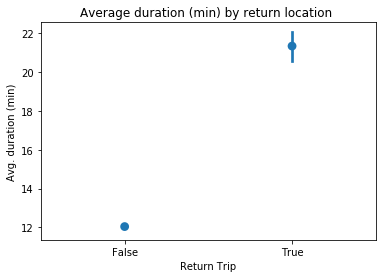

In [89]:
fig, ax = plt.subplots(1,1) 
sb.pointplot(data = tripdata_cleaned, x = 'return_trip', y = 'duration_min', linestyles = "")
plt.title('Average duration (min) by return location ')
plt.xlabel('Return Trip')
plt.ylabel('Avg. duration (min)') 

plt.show()

>There is a huge difference in terms of average duration between same depot and different depot. The average duration for users who returned the bike at the same depot is 8 minutes longer than users who return the bike at a different depot.

#### Based on information I gathered above, I am going to use a point plot to find out the relationship between week day and return trip, in terms of the average duration of rental

In [134]:
#I want to use groupby to see the mean duration of different groups
tripdata_cleaned.groupby(['week_day','return_trip']).mean()['duration_min']

week_day  return_trip
0         False          11.786156
          True           20.492894
1         False          11.158902
          True           17.709980
2         False          11.674937
          True           18.915095
3         False          11.439944
          True           19.263448
4         False          11.963121
          True           19.574212
5         False          14.004683
          True           24.859497
6         False          13.870917
          True           26.993302
Name: duration_min, dtype: float64

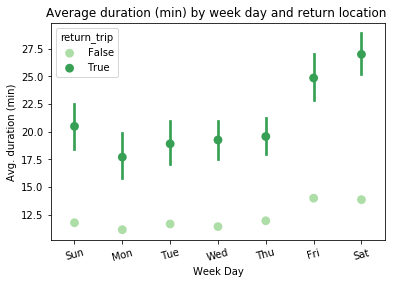

In [91]:
fig, ax = plt.subplots(1,1) 
sb.pointplot(data = tripdata_cleaned, x = 'week_day', y = 'duration_min',hue='return_trip', linestyles = "",  palette = 'Greens')
plt.title('Average duration (min) by week day and return location ')
plt.xlabel('Week Day')
plt.ylabel('Avg. duration (min)') 
x = np.arange(0,7,1)
x_ticks_labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation=15, fontsize=10)
plt.show()

In [78]:
tripdata_cleaned.duration_min.describe()

count    294848.000000
mean         12.146997
std           9.722978
min           1.000000
25%           6.133333
50%           9.783333
75%          15.116667
max          99.933333
Name: duration_min, dtype: float64

>There are interesting findings here - users who returned the bike to the same location had a longer average duration (at least 17.5 minutes), while users who returned the bike at a different location had hired the bike for a shorter average duraton of rental. The time duration was particularly high on Friday and Saturday.
However, I wonder if the longer duration had to do with unusual group of users who constantly hired for around 65 minutes. 

#### I want to analyse the odd groups of users who contantly rented bikes for 65 minutes

In [79]:
odd_min_deep_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,duration_hr,start_hour,start_combo,end_combo,return_trip,week_day
2209,3934,2020-01-31 13:50:07.339,2020-01-31 14:55:41.3650,160.0,West Oakland BART Station,37.805318,-122.294837,187.0,Jack London Square,37.796248,...,Customer,No,NaN,65.566667,1.092778,13,"37.805318299999996,-122.2948365","37.796248,-122.279352",False,4
6611,3927,2020-01-30 12:38:19.804,2020-01-30 13:43:47.7680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,...,Customer,No,NaN,65.450000,1.090833,12,"37.795392,-122.394203","37.80477,-122.40323400000001",False,3
6613,3900,2020-01-30 12:38:27.666,2020-01-30 13:43:27.6880,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,...,Customer,No,NaN,65.000000,1.083333,12,"37.795392,-122.394203","37.80477,-122.40323400000001",False,3
18573,3930,2020-01-27 13:24:39.457,2020-01-27 14:30:10.3690,164.0,Isabella St at San Pablo Ave,37.814988,-122.274844,164.0,Isabella St at San Pablo Ave,37.814988,...,Customer,No,NaN,65.500000,1.091667,13,"37.8149882304,-122.2748440504","37.8149882304,-122.2748440504",True,0
21014,3937,2020-01-26 16:36:55.071,2020-01-26 17:42:32.9020,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,436.0,McKinnon Ave at 3rd St,37.736296,...,Customer,No,NaN,65.616667,1.093611,16,"37.7810737,-122.4117382","37.736295872199996,-122.38996982569999",False,6


In [80]:
odd_min_deep_df.return_trip.value_counts()

False    583
True       6
Name: return_trip, dtype: int64

>Just from looking at the counts of return trips in the *odd* group (rentals for approx between 65-66 minutes), it didn't seem like the *odd* group attributed to the higher average of duration of rental. 

In [135]:
#I want to see if this group of users always returned bike at the same location
tripdata_cleaned[tripdata_cleaned.duration_min > 70].groupby('return_trip').size()*100/tripdata_cleaned[tripdata_cleaned.duration_min > 70].shape[0]

return_trip
False    83.992285
True     16.007715
dtype: float64

In [82]:
tripdata_cleaned.groupby('return_trip').size()*100/tripdata_cleaned.shape[0]

return_trip
False    98.835332
True      1.164668
dtype: float64

>The only explanation I could find is that ratio between same-depot and different-depot is largely different based on the rental duration. If we look at the full dataset, there are only 1.16% of users who returned the bike at the same depot, while that in the duration >70 min segment is 16%. 

#### Lastly, I want to quickly look at the **outlier_min** dataset which I created earlier. This dataset consists of data with duration minutes higher than 100 minutes.  

In [83]:
outlier_min.groupby('user_type').size()*100/outlier_min.shape[0]

user_type
Customer      81.212724
Subscriber    18.787276
dtype: float64

In [84]:
outlier_min.groupby('user_type').mean()['duration_min']

user_type
Customer      259.378131
Subscriber    291.035362
Name: duration_min, dtype: float64

In [85]:
outlier_min.sort_values(['duration_min'],ascending = False).head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,duration_hr
121168,811077,2020-01-09 16:23:21,2020-01-19 01:41:19,NaN,NaN,37.336035,-121.899836,NaN,NaN,37.336549,-121.900961,231296,Subscriber,NaN,clipper,13517.950000,225.299167
49926,86221,2020-01-16 07:51:37.7090,2020-01-17 07:48:39.5150,417.0,Park Ave at Race St,37.326011,-121.912327,417.0,Park Ave at Race St,37.326011,-121.912327,10424,Customer,No,NaN,1437.016667,23.950278
63677,85994,2020-01-12 17:08:54.1100,2020-01-13 17:02:08.5300,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,47.0,4th St at Harrison St,37.780955,-122.399749,11107,Customer,No,NaN,1433.233333,23.887222
27024,85450,2020-01-23 14:29:54.6580,2020-01-24 14:14:05.0000,14.0,Clay St at Battery St,37.795001,-122.399970,11.0,Davis St at Jackson St,37.797280,-122.398436,13072,Subscriber,No,NaN,1424.166667,23.736111
50984,85268,2020-01-15 18:13:47.2190,2020-01-16 17:54:55.2520,258.0,University Ave at Oxford St,37.872355,-122.266447,210.0,45th St at Manila,37.833294,-122.256224,1930,Customer,No,NaN,1421.133333,23.685556


>For a quick glance at the data, it looks like proportionally there were a lot more casual customers in the outlier group. Row 121168 is likely to be an error since this user rented the bike for about 10 days. 

### Relationships  observed in this part of the investigation - features that strengthened each other in terms of looking at feature(s) of interest?

I extended my investigation of duration (minutes) against categorical features by measuring the effect of average duration against start hour, week day, return depot and user type. The multivatirate exploration above showed that there was a positive effect of the return depot - users who returned the bike at the same depot had a longer rental duration. This effect became more obvious and a trend could be observed when an additional categorical variable *week day* was added in the analysis: the average duration of rental for users who returned bike at the same depot was consistently longer throughtout the week. 

When looking at the general statistics of user type in my initial univariate analysis, I couldn't find anything particularly interesting. However, once I used a point plot to analyse the average duration by week day and user type, an interesting user behavioural trend could be brought to light - casual customers hired bikes for a longer time on average on Friday and Saturday. 

### Were there any interesting or surprising interactions between features?

When looking at the scatter plot showing relationship between start hour and duration (min), a group of users were constantly renting bikes for about 66 minutes at different hours thoroughout the day. I extended by investigation to analyse this group of users using different dimensions but due to lacking customer information (such as customer id), it was hard to draw any conclusions to explain this odd group of users. 